# EDA for Swimming Olympics Dataset

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Initial Statistics

In [104]:
swim_df = pd.read_csv('../data/processed/swimming/swimming_results.csv')

In [105]:
swim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Athlete   3258 non-null   object
 1   Country   3258 non-null   object
 2   NOC       3258 non-null   object
 3   Season    3258 non-null   object
 4   Year      3258 non-null   int64 
 5   City      3258 non-null   object
 6   Sport     3258 non-null   object
 7   Event     3258 non-null   object
 8   Medal     3258 non-null   object
 9   Category  3258 non-null   object
dtypes: int64(1), object(9)
memory usage: 254.7+ KB


In [106]:
print(f"Min Date: {swim_df['Year'].min()}")
print(f"Max Date: {swim_df['Year'].max()}")


Min Date: 1896
Max Date: 2024


In [107]:
# view the categorical columns summary statistics
swim_df[swim_df.dtypes[swim_df.dtypes == 'object'].index].describe()

,Athlete,Country,NOC,Season,City,Sport,Event,Medal,Category
count,3258,3258,3258,3258,3258,3258,3258,3258,3258
unique,1756,62,57,1,23,1,57,3,3
top,"Michael Fred Phelps, Ii",United States,USA,Summer,London,Swimming,4X100M Freestyle Relay,Gold,Men
freq,28,1124,1136,3258,278,3258,571,1169,1776


### Dataframe Statistics Summary

The data looks as expected.
- There are only three values for Medal (Gold, Silver, Bronze)
- There are only three values for Category (Men, Women, Mixed)
- There is only one Sport (Swimming)
- The  Athlete, Country, and Event count cannot be verified right now, but can be explored more.

## Analyze the Last 50 Years of Olympic Swimming

In [108]:
# filter by the year
recent_swim_df = swim_df[swim_df['Year'] >= 1974]

recent_swim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 3257
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Athlete   2099 non-null   object
 1   Country   2099 non-null   object
 2   NOC       2099 non-null   object
 3   Season    2099 non-null   object
 4   Year      2099 non-null   int64 
 5   City      2099 non-null   object
 6   Sport     2099 non-null   object
 7   Event     2099 non-null   object
 8   Medal     2099 non-null   object
 9   Category  2099 non-null   object
dtypes: int64(1), object(9)
memory usage: 180.4+ KB


### View percentage by Country

In [109]:
# groupby country and count the number of medals
country_medals = recent_swim_df.groupby('Country').size().reset_index(name='Medals')
country_medals = country_medals.sort_values(by='Medals', ascending=False)
country_medals.head(10)

,Country,Medals
48,United States,675
1,Australia,302
13,East Germany,115
16,Germany,93
7,Canada,89
8,China,88
26,Netherlands,75
38,Soviet Union,75
17,Great Britain,62
15,France,62


In [110]:
recent_swim_df = recent_swim_df.copy()

# replace East Germany with Germany
recent_swim_df.loc[recent_swim_df['Country'] == 'East Germany', 'Country'] = 'Germany'
# replace Soviet Union with Russia
recent_swim_df.loc[recent_swim_df['Country'] == 'Soviet Union', 'Country'] = 'Russia'

# groupby country and count the number of medals
country_medals = recent_swim_df.groupby('Country').size().reset_index(name='Medals')
country_medals = country_medals.sort_values(by='Medals', ascending=False)
country_medals.head(10) 


,Country,Medals
46,United States,675
1,Australia,302
15,Germany,208
30,Russia,123
7,Canada,89
8,China,88
25,Netherlands,75
14,France,62
16,Great Britain,62
22,Japan,59


In [111]:
# get the top 10 countries
top_10_countries = country_medals.head(10)['Country'].values
top_10_countries

array(['United States', 'Australia', 'Germany', 'Russia', 'Canada',
       'China', 'Netherlands', 'France', 'Great Britain', 'Japan'],
      dtype=object)

In [112]:
# group by year and country to get the number of medals
year_country_medals = recent_swim_df[recent_swim_df['Country'].isin(top_10_countries)].groupby(['Year', 'Country']).size().reset_index(name='Medals')
year_country_medals.head()

,Year,Country,Medals
0,1976,Australia,1
1,1976,Canada,20
2,1976,Germany,28
3,1976,Great Britain,6
4,1976,Netherlands,2


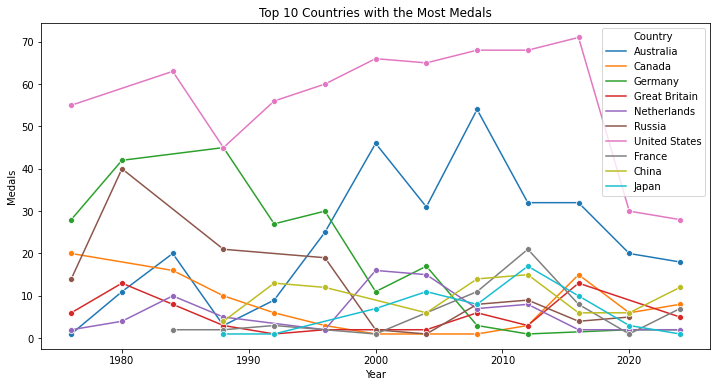

In [113]:
# plot the top 10 countries with the most medals over the years
plt.figure(figsize=(12, 6))
sns.lineplot(y='Medals', x='Year', data=year_country_medals, hue='Country', marker='o')
plt.title('Top 10 Countries with the Most Medals')
plt.show()

### View Results by Gender

In [114]:
recent_swim_df['Category'].value_counts()

Men      1073
Women    1020
Mixed       6
Name: Category, dtype: int64

In [115]:
# split the df by gender
men_swim_df = recent_swim_df[recent_swim_df['Category'] == 'Men']
women_swim_df = recent_swim_df[recent_swim_df['Category'] == 'Women']

In [116]:
def top_ten_countries(df):
    # groupby country and count the number of medals
    country_medals = df.groupby('Country').size().reset_index(name='Medals')
    country_medals = country_medals.sort_values(by='Medals', ascending=False)
    # get the top 10 countries
    top_10_countries = country_medals.head(10)['Country'].values
    top_10_df = df[df['Country'].isin(top_10_countries)]
    year_country_medals = top_10_df.groupby(['Year', 'Country']).size().reset_index(name='Medals')
    
    return year_country_medals   

In [117]:
men_top_ten_df = top_ten_countries(men_swim_df)
men_top_ten_df.head()

,Year,Country,Medals
0,1976,Australia,1
1,1976,Canada,5
2,1976,Germany,1
3,1976,Great Britain,6
4,1976,Russia,9


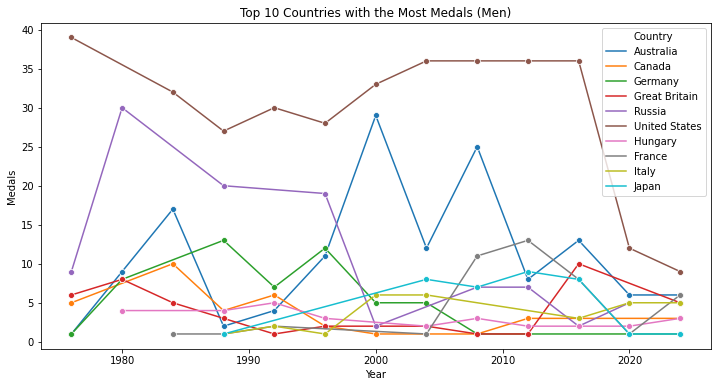

In [118]:
# plot the top 10 countries with the most medals over the years
plt.figure(figsize=(12, 6))
sns.lineplot(y='Medals', x='Year', data=men_top_ten_df, hue='Country', marker='o')
plt.title('Top 10 Countries with the Most Medals (Men)')
plt.show()

In [121]:
men_top_ten_df[men_top_ten_df['Country'] == 'Japan']

,Year,Country,Medals
23,1988,Japan,1
54,2004,Japan,8
62,2008,Japan,7
71,2012,Japan,9
79,2016,Japan,8
87,2020,Japan,1
97,2024,Japan,1


In [119]:
women_top_ten_df = top_ten_countries(women_swim_df)
women_top_ten_df.head()

,Year,Country,Medals
0,1976,Canada,15
1,1976,Germany,27
2,1976,Netherlands,2
3,1976,Russia,5
4,1976,United States,16


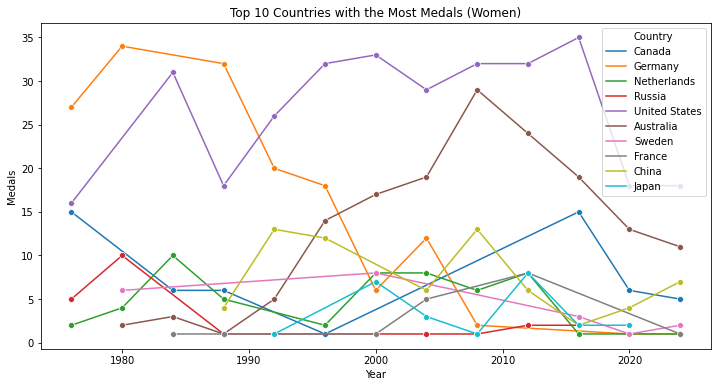

In [120]:
# plot the top 10 countries with the most medals over the years
plt.figure(figsize=(12, 6))
sns.lineplot(y='Medals', x='Year', data=women_top_ten_df, hue='Country', marker='o')
plt.title('Top 10 Countries with the Most Medals (Women)')
plt.show()